# BERT Lab

Reference
- Keras BERT Library: [Keras BERT ](https://github.com/CyberZHG/keras-bert)
- Homonym examples:
    - [Quora Q&A](https://www.quora.com/What-are-the-20-homonyms-with-sentences-of-each-of-them)
    - [BERT as a Teacher: Contextual Embeddings for Sequence-Level Reward](https://arxiv.org/pdf/2003.02738.pdf)


Task:
Compare word embeddings of homonyms
- Pick a homonym, H, that has multiple meanings
- Write two pairs of sentences

  -- Case 1: H has the same meaning in the two sentences

  -- Case 2: H has different meanings in the two sentences
- Extract context dependent embeddings of H from two sentences, respectively.
- Calculate similarity scores, Sc1 and Sc2, between the embeddings in each case
- Is Sc1 much larger than Sc2?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip3 install keras-bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33515 sha256=83ff47f8a4f928b108a99a37cbb57113d85d658ab4299af8b4223804997e2b81
  Stored in directory: /root/.cache/pip/wheels/a4/e8/45/842b3a39831261aef9154b907eacbc4ac99499a99ae829b06f
  Created wheel for keras-transformer: filename=keras_transformer-0.40.0-py3-none-any.whl size=12305 sha256=34b796e064c7552ebe811083817a316af6465c6cd79227baf78d3845d947cdf1
  Stored in directory: /root/.cache/pip/wheels/46/68/26/692ed21edd832833c3b0a0e21615bcacd99ca458b3f9ed571f
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.10.0-py3-none-any.whl size=3959 sha256=87cedd9faddd241700ba12e143af182bf64510db15575f5808f3f0b286fedd35
  Stored in directory: /root/.cache/pip/wheels/81/67/b5/d847588d075895281e1cf5590f819bd4cf076a554872268bd5
  Created wheel for keras-layer-normalization: filename=keras_layer_normalizatio

In [ ]:
from keras_bert import get_pretrained, PretrainedList, get_checkpoint_paths
from keras_bert import extract_embeddings


model_path = get_pretrained(PretrainedList.wwm_uncased_large)
paths = get_checkpoint_paths(model_path)
print(paths.config, paths.checkpoint, paths.vocab)

/root/.keras/datasets/wwm_uncased_L-24_H-1024_A-16/bert_config.json /root/.keras/datasets/wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt /root/.keras/datasets/wwm_uncased_L-24_H-1024_A-16/vocab.txt


## 1. Compare a homonym with different meanings in two different sequences

In [ ]:
model_path = '/root/.keras/datasets/wwm_uncased_L-24_H-1024_A-16'
# texts = ['He went to a bank to get more money.', 'across the street a man entered the pnc bank.']
# keyword = 'bank'

# texts = ['He went to a bank to get more money.', 'she went to the bank and put the documents in her safety deposit box.']
# keyword = 'bank'

# texts = ['He went to a bank to get more money.','she swam close to the bank of the river.']
# keyword = 'bank'

# texts = ['My salary is paid directly into my bank.', 'He jumped in and swam to the opposite bank.']
# keyword = 'bank'

# texts = ['Do you want to go to the fair today?', 'The State Fair of Texas is the best fair.']
# keyword = 'fair'

# texts = ['Do you want to go to the fair today?', 'Life is not fair.']
# keyword = 'fair'

# texts = ["As she leaves the table, the room goes silent", "Leaves fall to the ground"] 
# keyword = 'leaves'


# texts = ['What does this sentence mean?', 'We found the mean of the numbers']
# keyword = 'mean'

texts = ['The waves were perfect for surfing.', 'She waves each time I drive past her house.']
keyword = 'waves'

#texts = ['I gave the rat some cheese.', 'That man is a rat.', 'I think there is a rat in my computer']
# texts = ['I gave the rat some cheese.', 'That man is a rat.']
# keyword = 'rat'


# texts = ['I think the delivery address is incorrect.', 'Tonight the President will address the nation.']
# keyword = 'address'


# uncomment two lines below after making your text sequences sharing the same homonym
# texts = ['replace two text sequences with yours']
# keyword = 'your keyword' 

embeddings = extract_embeddings(model_path, texts)

1/1 [==============================] - 26s 26s/step


In [ ]:
import codecs
from keras_bert import Tokenizer
token_dict = {}

with codecs.open(paths.vocab, 'r', 'utf8') as reader:
    for line in reader:
        token = line.strip()
        token_dict[token] = len(token_dict)

tokenizer = Tokenizer(token_dict)

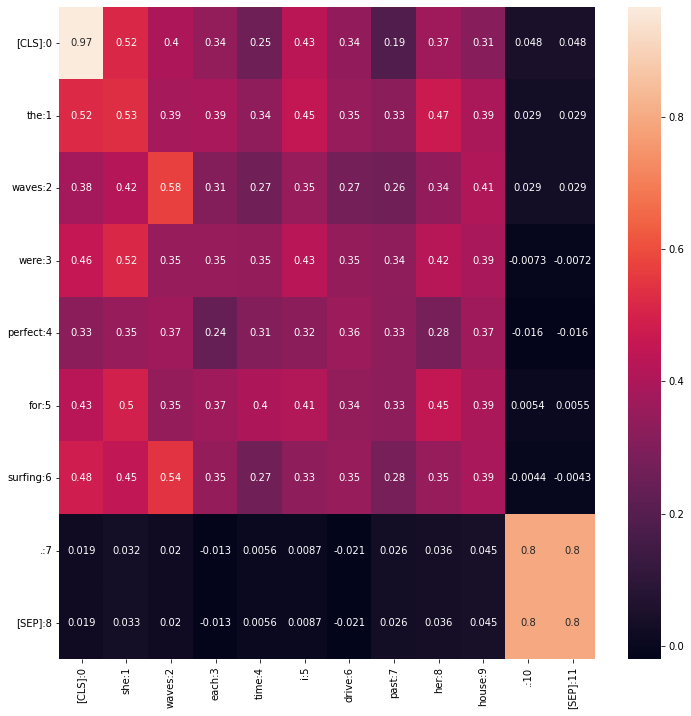

In [ ]:
from scipy import spatial
dist = np.zeros((embeddings[0].shape[0], embeddings[1].shape[0]))

for i in range(embeddings[0].shape[0]):
  for j in range(embeddings[1].shape[0]):
    dist[i,j] = 1 - spatial.distance.cosine(embeddings[0][i,:],embeddings[1][j,:])

plt.figure(figsize=(12, 12))

tokens1 = tokenizer.tokenize(texts[1])
tokens1_labels = [f'{elm}:{index}' for index, elm in enumerate(tokens1)]

tokens2 = tokenizer.tokenize(texts[0])
tokens2_labels = [f'{elm}:{index}' for index, elm in enumerate(tokens2)]

heat_map = sns.heatmap(dist, annot=True)
heat_map.set_xticklabels(tokens1_labels, rotation = 90)
heat_map.set_yticklabels(tokens2_labels, rotation = 0)
plt.show()

In [ ]:
print(tokens1.index(keyword))
print(tokens2.index(keyword))
print(dist[tokens2.index(keyword),tokens1.index(keyword)])

2
2
0.5762713551521301


## 2. Compare a homonym with the same meaning in two different sequences


In [ ]:
from keras_bert import extract_embeddings

model_path = '/root/.keras/datasets/wwm_uncased_L-24_H-1024_A-16'

# texts = ['He went to a bank to get more money.', 'across the street a man entered the pnc bank.']
# keyword = 'bank'

texts = ['she went to the bank and put the documents in her safety deposit box.','He went to a bank to get more money.']
keyword = 'bank'

texts = ["As she leaves the table, the room goes silent", "He leaves your house after dark"] 
keyword = 'leaves'
#"Leaves fall to the ground"


# texts = ['He went to a bank to get more money.','she swam close to the bank of the river.']
# keyword = 'bank'

# texts = ['My salary is paid directly into my bank.', 'He jumped in and swam to the opposite bank.']
# keyword = 'bank'

# uncomment two lines below after making your text sequences sharing the same homonym
# texts = ['replace two text sequences with yours']
# keyword = 'your keyword' 

embeddings = extract_embeddings(model_path, texts)

1/1 [==============================] - 26s 26s/step


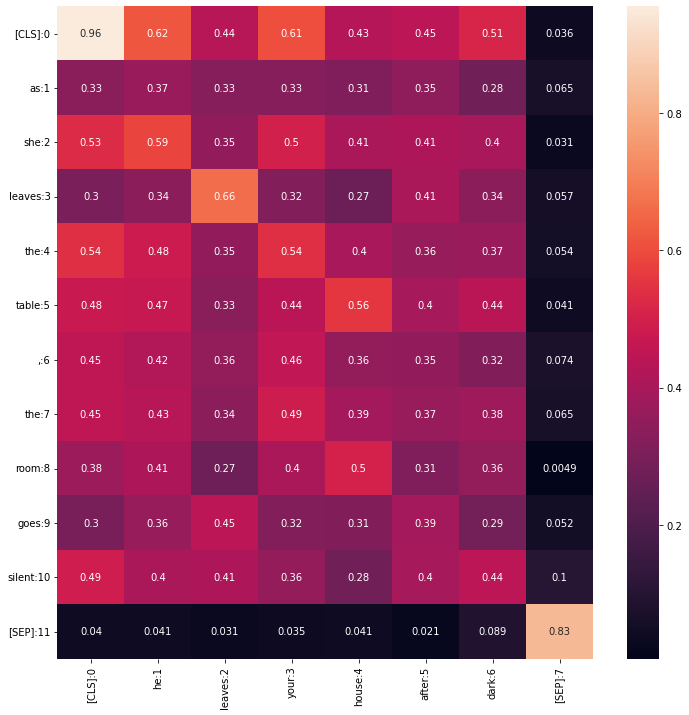

In [ ]:
from scipy import spatial
dist = np.zeros((embeddings[0].shape[0], embeddings[1].shape[0]))

for i in range(embeddings[0].shape[0]):
  for j in range(embeddings[1].shape[0]):
    dist[i,j] = 1 - spatial.distance.cosine(embeddings[0][i,:],embeddings[1][j,:])

plt.figure(figsize=(12, 12))

tokens1 = tokenizer.tokenize(texts[1])
tokens1_labels = [f'{elm}:{index}' for index, elm in enumerate(tokens1)]

tokens2 = tokenizer.tokenize(texts[0])
tokens2_labels = [f'{elm}:{index}' for index, elm in enumerate(tokens2)]

heat_map = sns.heatmap(dist, annot=True)
heat_map.set_xticklabels(tokens1_labels, rotation = 90)
heat_map.set_yticklabels(tokens2_labels, rotation = 0)
plt.show()

In [ ]:
print(tokens1.index(keyword))
print(tokens2.index(keyword))
print(dist[tokens2.index(keyword),tokens1.index(keyword)])

2
3
0.6624902486801147


## 3. Compare words within the same sequence

In [ ]:
from keras_bert import extract_embeddings

model_path = '/root/.keras/datasets/wwm_uncased_L-24_H-1024_A-16'

# texts = ['Can you get me a can? The can is empty.']
# keyword = 'can'
# texts = ['He went to a bank to get more money. She swam close to the bank of the river. She went to the bank and put the documents in her safety deposit box.']
# keyword = 'bank'

texts = ['Samantha Rose up to pick up a rose. She picked her finger on the rose thron.']
keyword = 'rose'

# uncomment two lines below after making your text sequence containing multiple homonyms
# texts = ['replace this text with yours']
# keyword = 'your keyword' 

embeddings = extract_embeddings(model_path, texts)

1/1 [==============================] - 19s 19s/step


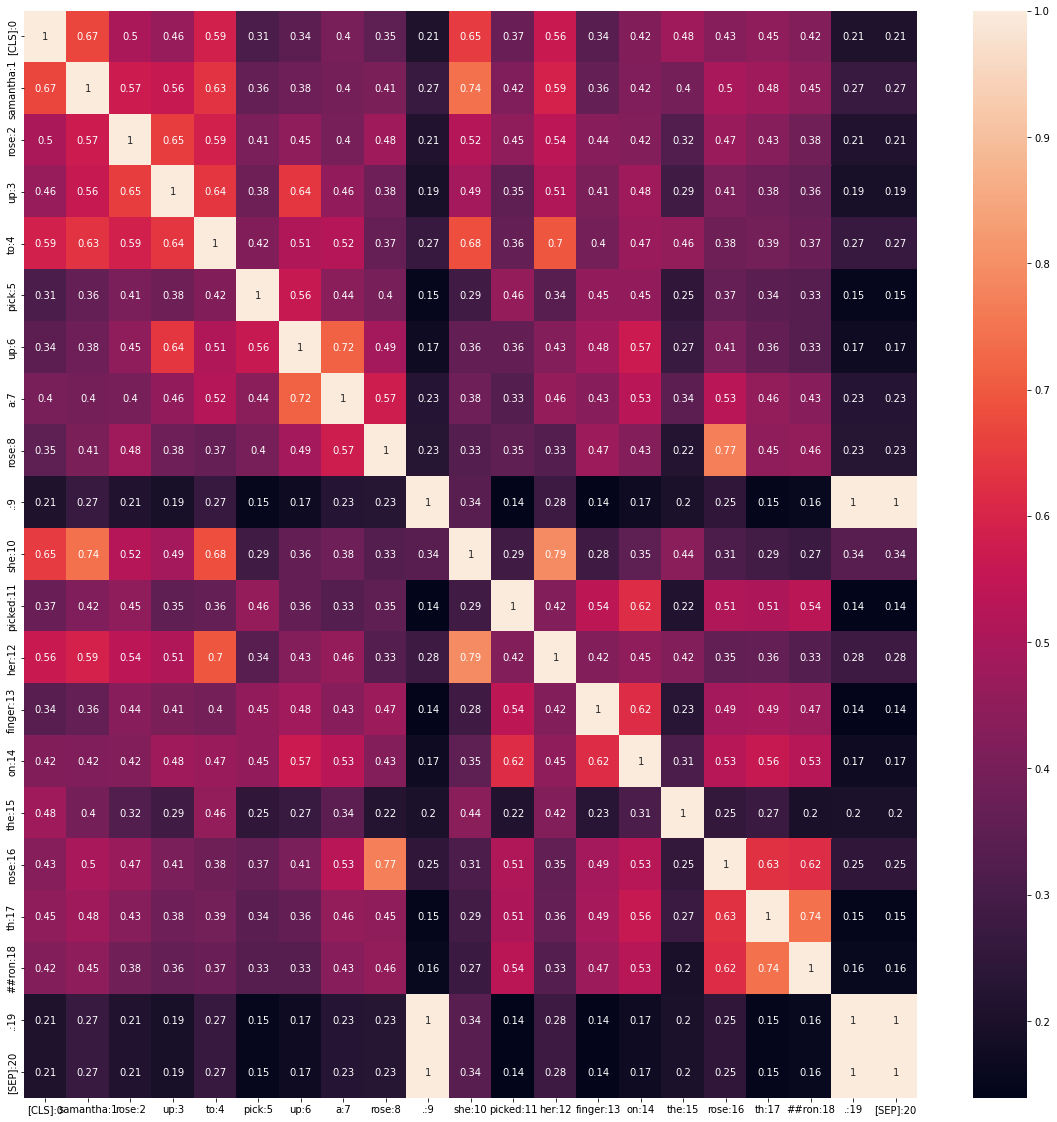

In [ ]:
from scipy import spatial
dist = np.zeros((embeddings[0].shape[0], embeddings[0].shape[0]))

for i in range(embeddings[0].shape[0]):
  for j in range(embeddings[0].shape[0]):
    dist[i,j] = 1 - spatial.distance.cosine(embeddings[0][i,:],embeddings[0][j,:])

# plt.figure(figsize=(12, 12))

tokens = tokenizer.tokenize(texts[0])
tokens_labels = [f'{elm}:{index}' for index, elm in enumerate(tokens)]
# plt.xticks(ticks=np.arange(len(tokens_labels)), labels=tokens_labels, rotation=90)
# plt.yticks(ticks=np.arange(len(tokens_labels)), labels=tokens_labels)

# plt.imshow(dist)
# plt.show()


plt.figure(figsize=(20, 20))
heat_map = sns.heatmap(dist, annot=True)
heat_map.set_xticklabels(tokens_labels, rotation = 0)
heat_map.set_yticklabels(tokens_labels)
plt.show()



In [ ]:
from more_itertools import locate
indexPosList = list(locate(tokens, lambda a: a == keyword))
print(indexPosList)

distsub = np.zeros((len(indexPosList), len(indexPosList)))
for i in indexPosList:
  for j in indexPosList:
    print(tokens_labels[i],tokens_labels[j],':',dist[i,j])

[2, 8, 16]
rose:2 rose:2 : 1.0
rose:2 rose:8 : 0.4763256311416626
rose:2 rose:16 : 0.47154155373573303
rose:8 rose:2 : 0.4763256311416626
rose:8 rose:8 : 1.0
rose:8 rose:16 : 0.7690528631210327
rose:16 rose:2 : 0.47154155373573303
rose:16 rose:8 : 0.7690528631210327
rose:16 rose:16 : 1.0
